In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_169.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_280.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_224.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_65.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_198.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_23.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_229.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_99.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_34.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_286.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_108.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_247.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/val/PCB/pcb_189.jpg
/kaggle/input/e-waste-image-dataset/modified-dataset/va

🟢 مشروع: تصنيف حالات الطقس بالاعتماد على الشبكات العصبية CNN

كود كامل لتدريب نموذج لتصنيف صور الطقس (Cloudy ☁️، Rain 🌧️، Shine ☀️، Sunrise 🌅)
باستخدام TensorFlow + Keras مع رسوم بيانية وتقرير لتقييم النتائج

📌 1) استيراد المكتبات

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report

📁 2) تحميل البيانات ومعالجتها

In [6]:
# المسارات (تأكد من صحة المسارات في Kaggle Dataset)
train_dir = "//kaggle/input/e-waste-image-dataset/modified-dataset/train"
val_dir = "/kaggle/input/e-waste-image-dataset/modified-dataset/val"
test_dir = "/kaggle/input/e-waste-image-dataset/modified-dataset/test"

In [7]:
# تجهيز البيانات (إعادة تحجيم الصور)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=False)

Found 2400 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [8]:
# عدد الفئات
num_classes = len(train_generator.class_indices)
print("عدد الفئات:", num_classes)


🧠 3) بناء نموذج CNN

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 02:10:09.633488: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,642 (18.42 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

🏋️ 4) تدريب النموذج

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 66s 836ms/step - accuracy: 0.1820 - loss: 2.1660 - val_accuracy: 0.5067 - val_loss: 1.4923
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 61s 806ms/step - accuracy: 0.5054 - loss: 1.4438 - val_accuracy: 0.5567 - val_loss: 1.3249
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 60s 800ms/step - accuracy: 0.6290 - loss: 1.0821 - val_accuracy: 0.6600 - val_loss: 1.1083
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 60s 801ms/step - accuracy: 0.7282 - loss: 0.8180 - val_accuracy: 0.6600 - val_loss: 1.0177
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 787ms/step - accuracy: 0.8255 - loss: 0.5632 - val_accuracy: 0.6933 - val_loss: 1.0702
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 780ms/step - accuracy: 0.8698 - loss: 0.4108 - val_accuracy: 0.6833 - val_loss: 1.0754
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 775ms/step - accuracy: 0.8840 - loss: 0.3506 - val_accuracy: 0.7133 - val_loss: 1.0610


📉 5) عرض منحنيات التدريب

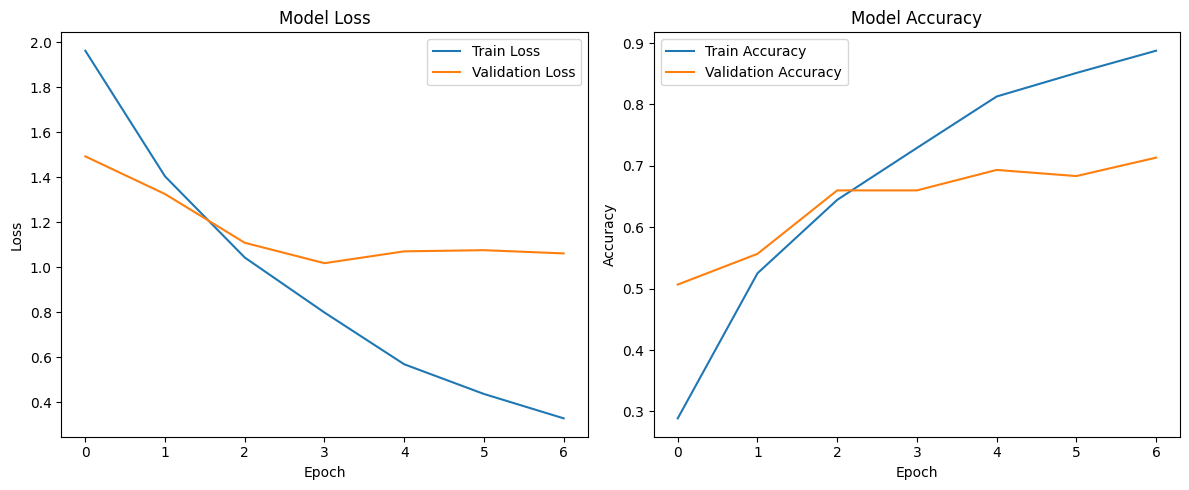

In [15]:
plt.figure(figsize=(12, 5))
# منحنى الخسارة
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# منحنى الدقة
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

🧪 6) تقييم النموذج على بيانات الاختبار

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.6133 - loss: 1.1579
Test Loss: 1.2057
Test Accuracy: 0.6033


📊 7) مصفوفة الالتباس + تقرير التصنيف

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step


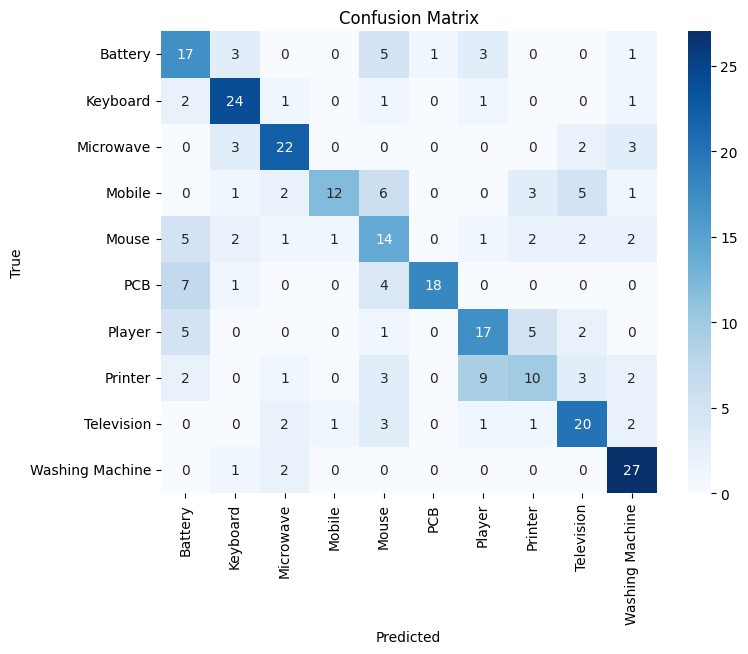

                 precision    recall  f1-score   support

        Battery       0.45      0.57      0.50        30
       Keyboard       0.69      0.80      0.74        30
      Microwave       0.71      0.73      0.72        30
         Mobile       0.86      0.40      0.55        30
          Mouse       0.38      0.47      0.42        30
            PCB       0.95      0.60      0.73        30
         Player       0.53      0.57      0.55        30
        Printer       0.48      0.33      0.39        30
     Television       0.59      0.67      0.62        30
Washing Machine       0.69      0.90      0.78        30

       accuracy                           0.60       300
      macro avg       0.63      0.60      0.60       300
   weighted avg       0.63      0.60      0.60       300



In [13]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
class_labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

💾 8) حفظ النموذج

In [14]:
import requests
from PIL import Image
from io import BytesIO

image_url = "https://example.com/your-ewaste-image.jpg"  # replace with real URL
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert('RGB')
img = img.resize((150, 150))

img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_names = list(train_generator.class_indices.keys())

print(f"Predicted class: {class_names[predicted_class]}")

ConnectionError: HTTPSConnectionPool(host='example.com', port=443): Max retries exceeded with url: /your-ewaste-image.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x79644a605950>: Failed to resolve 'example.com' ([Errno -3] Temporary failure in name resolution)"))

In [24]:
model.save('/kaggle/working/e_waste_model.h5')
